In [1]:
#Libariries for Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#Libraries for ML
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

#To make the cells look cleaner
import warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('Cleaned Training.csv', index_col = 'match_id')
df2 = pd.read_csv('Cleaned Testing.csv', index_col = 'match_id')

In [3]:
df.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,dire_first_ward_time,radiant_win,Radiant_Total_xp,Dire_Total_xp,Radiant_Total_gold,Dire_Total_gold,Radiant_Total_lh,Dire_Total_lh,Radiant_Total_kills,Dire_Total_kills
match_id,,,,,,,,,,,,,,,,,,,,,
1,44,7,97,6,29,9,85,8,40,7,...,0.0,1,5497,6419,4615,4348,46,52,0,0
2,77,6,47,15,68,9,20,7,51,7,...,-9.0,0,5820,5115,6021,3989,61,30,2,0
3,66,7,22,8,76,6,23,6,87,7,...,18.0,1,8085,6007,6491,5096,75,59,2,1
4,5,10,53,4,1,7,21,9,11,4,...,0.0,0,7756,5937,6436,4907,73,48,2,1
5,102,6,98,9,75,5,21,2,74,6,...,0.0,0,5399,5931,5143,5471,44,42,1,2


In [4]:
df.columns

Index(['r1_hero', 'r1_items', 'r2_hero', 'r2_items', 'r3_hero', 'r3_items',
       'r4_hero', 'r4_items', 'r5_hero', 'r5_items', 'd1_hero', 'd1_items',
       'd2_hero', 'd2_items', 'd3_hero', 'd3_items', 'd4_hero', 'd4_items',
       'd5_hero', 'd5_items', 'first_blood_time', 'first_blood_team',
       'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time',
       'radiant_courier_time', 'radiant_flying_courier_time',
       'radiant_tpscroll_count', 'radiant_boots_count',
       'radiant_ward_observer_count', 'radiant_ward_sentry_count',
       'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time',
       'dire_flying_courier_time', 'dire_tpscroll_count', 'dire_boots_count',
       'dire_ward_observer_count', 'dire_ward_sentry_count',
       'dire_first_ward_time', 'radiant_win', 'Radiant_Total_xp',
       'Dire_Total_xp', 'Radiant_Total_gold', 'Dire_Total_gold',
       'Radiant_Total_lh', 'Dire_Total_lh', 'Radiant_Total_kills',
       'Dire_Total_kills'],
 

## I have a hypothesis that the models are reading the Hero and Item columns as continuous data rather than categorical. By turning these columns into dummy data, I expect some of my models to improve their performance by a slight amount. Am also going to change some of the features I engineers in my Dataframe Cleaning and EDA notebook to be more specific to Radiant

### Feature Engineering - Determining whether Radiant Winning or not in early game

In [5]:
def to_radiant(df):
    df['Radiant_Dire_xp_dif'] = df.Radiant_Total_xp - df.Dire_Total_xp
    df['Radiant_Dire_gold_dif'] = df.Radiant_Total_gold - df.Dire_Total_gold
    df['Radiant_Dire_lh_dif'] = df.Radiant_Total_lh - df.Dire_Total_lh
    df['Radiant_Dire_kill_dif'] = df.Radiant_Total_kills - df.Dire_Total_kills
    df['Radiant_BottleTime_dif'] = df.radiant_bottle_time - df.dire_bottle_time
    df['Radiant_CourierTime_dif'] = abs(df.radiant_courier_time) - abs(df.dire_courier_time)
    df['Radiant_FlyingCourier_dif'] = df.radiant_flying_courier_time - df.dire_flying_courier_time
    df['Radiant_boots_count_dif'] = df.radiant_boots_count - df.dire_boots_count
    df['Radiant_tp_dif'] = df.radiant_tpscroll_count - df.dire_tpscroll_count
    df['Radiant_ward_observer_dif'] = df.radiant_ward_observer_count - df.dire_ward_observer_count
    df['Radiant_ward_sentry_dif'] = df.radiant_ward_sentry_count - df.dire_ward_sentry_count
    df.drop(columns=['Radiant_Total_xp', 'Radiant_Total_gold', 'Radiant_Total_lh', 'Radiant_Total_kills',
                    'Dire_Total_xp', 'Dire_Total_gold', 'Dire_Total_lh', 'Dire_Total_kills',
                    'radiant_bottle_time', 'dire_bottle_time', 'radiant_courier_time', 'dire_courier_time', 
                    'radiant_flying_courier_time', 'dire_flying_courier_time',
                    'radiant_tpscroll_count', 'radiant_boots_count', 'radiant_ward_observer_count', 
                     'radiant_ward_sentry_count', 'radiant_first_ward_time', 'dire_bottle_time', 
                     'dire_courier_time','dire_flying_courier_time', 'dire_tpscroll_count', 'dire_boots_count',
                     'dire_ward_observer_count', 'dire_ward_sentry_count'], inplace=True)
    return df

In [6]:
df = to_radiant(df)

In [7]:
df2 = to_radiant(df2)

In [8]:
df.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,Radiant_Dire_gold_dif,Radiant_Dire_lh_dif,Radiant_Dire_kill_dif,Radiant_BottleTime_dif,Radiant_CourierTime_dif,Radiant_FlyingCourier_dif,Radiant_boots_count_dif,Radiant_tp_dif,Radiant_ward_observer_dif,Radiant_ward_sentry_dif
match_id,,,,,,,,,,,,,,,,,,,,,
1,44,7,97,6,29,9,85,8,40,7,...,267,-6,0,-23.0,-9.0,0.0,2,6,1,0
2,77,6,47,15,68,9,20,7,51,7,...,2032,31,2,0.0,-17.0,-33.0,2,-2,-1,-2
3,66,7,22,8,76,6,23,6,87,7,...,1395,16,1,43.0,34.0,-283.0,2,-4,0,0
4,5,10,53,4,1,7,21,9,11,4,...,1529,25,1,160.0,-20.0,216.0,1,-3,2,0
5,102,6,98,9,75,5,21,2,74,6,...,-328,2,-1,20.0,-44.0,0.0,-1,1,-1,0


In [9]:
df2.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,Radiant_Dire_gold_dif,Radiant_Dire_lh_dif,Radiant_Dire_kill_dif,Radiant_BottleTime_dif,Radiant_CourierTime_dif,Radiant_FlyingCourier_dif,Radiant_boots_count_dif,Radiant_tp_dif,Radiant_ward_observer_dif,Radiant_ward_sentry_dif
match_id,,,,,,,,,,,,,,,,,,,,,
1,57,8,11,8,50,6,59,16,104,7,...,-114,10,-1,99.0,5.0,-197.0,-2,2,0,0
2,51,6,42,5,76,9,23,6,8,7,...,-617,-7,0,-247.0,4.0,262.0,1,2,1,0
3,112,2,71,0,8,7,11,3,26,9,...,610,16,-1,156.0,0.0,77.0,-1,-1,1,0
4,57,9,62,7,44,3,107,6,76,11,...,347,4,0,180.0,-169.0,214.0,-2,-1,0,0
5,74,5,85,10,97,6,71,5,54,7,...,-1312,-13,-2,-272.0,3.0,0.0,1,2,-2,1


# Models

In [10]:
def model_maker(classifier):
    warnings.filterwarnings("ignore")
    
    X = df.drop('radiant_win', axis=1)
    y = df.radiant_win
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
   
    clf = classifier
    
    clf.fit(X, y)
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    print("Training Scores")
    print("Precision Score: {}".format(precision_score(y_train, train_preds)))
    print("Recall Score: {}".format(recall_score(y_train, train_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y_train, train_preds)))
    print("F1 Score: {}".format(f1_score(y_train, train_preds)))
    
    cm_lr = confusion_matrix(y_train, train_preds)

    plt.figure(figsize = (9, 9))
    sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix for Train Data')
    
    print("\nTesting Scores")
    print("Precision Score: {}".format(precision_score(y_test, test_preds)))
    print("Recall Score: {}".format(recall_score(y_test, test_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds)))
    print("F1 Score: {}".format(f1_score(y_test, test_preds)))
    
    
    cm_lr = confusion_matrix(y_test, test_preds)

    plt.figure(figsize = (9, 9))
    sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix for Test Data')
    
    return clf

## Logistic Regression Iteration 1
This model saw a 4% boost to the F1 Score for training and testing and a 6% increase for testing data. The false negatives and positives decreased by several thousand and this model looks to be the best one

Training Scores
Precision Score: 0.5535415826177166
Recall Score: 0.5517449375269281
Accuracy Score: 0.541880266336692
F1 Score: 0.5526417998475194

Testing Scores
Precision Score: 0.5542011319111885
Recall Score: 0.5532858136300417
Accuracy Score: 0.546623652112427
F1 Score: 0.5537430945234677


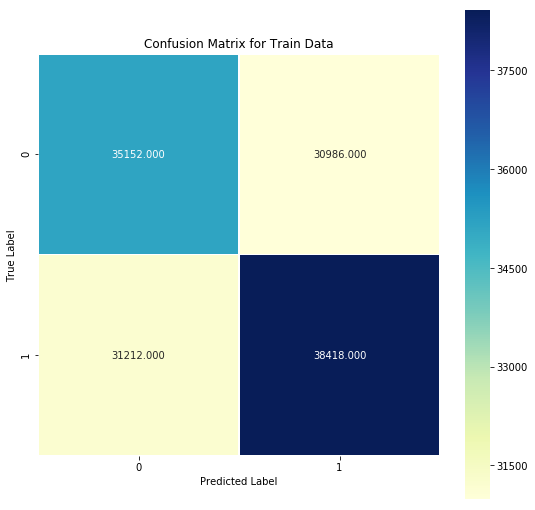

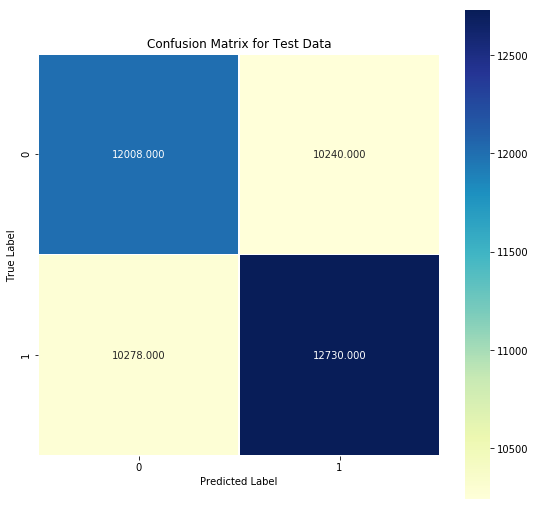

In [11]:
logreg = model_maker(LogisticRegression(n_jobs = 6))

# GridSearch to Improve Score

In [ ]:
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
clf_gs = GridSearchCV(LogisticRegression(), hyperparameters, cv=5, scoring='f1') 

In [ ]:
X = df.drop('radiant_win', axis=1)
y = df.radiant_win
    
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

model = clf_gs.fit(X_train, y_train)

In [ ]:
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

In [ ]:
y_pred_train = model.best_estimator_.predict(X_train)

y_pred_test = model.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train))
print("Testing F1 Score:",f1_score(y_test, y_pred_test))

In [ ]:
logreg2 = model_maker(LogisticRegression(penalty = 'l2', C= 0.001, n_jobs = 6))

# XGBoost

In [12]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100, n_jobs=8)

X = df.drop('radiant_win', axis=1)
y = df.radiant_win
    
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [13]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Training Scores
Precision Score: 0.6194209808325639
Recall Score: 0.6472104240155496
Accuracy Score: 0.6160951034117023
F1 Score: 0.6330108571669976

Testing Scores
Precision Score: 0.6176251551510137
Recall Score: 0.6439201138765475
Accuracy Score: 0.6133772317482765
F1 Score: 0.6304985956539185


Text(0.5, 1.0, 'Confusion Matrix for Test Data')

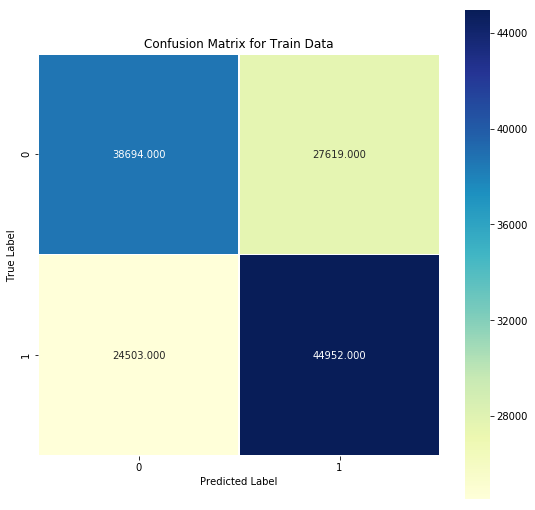

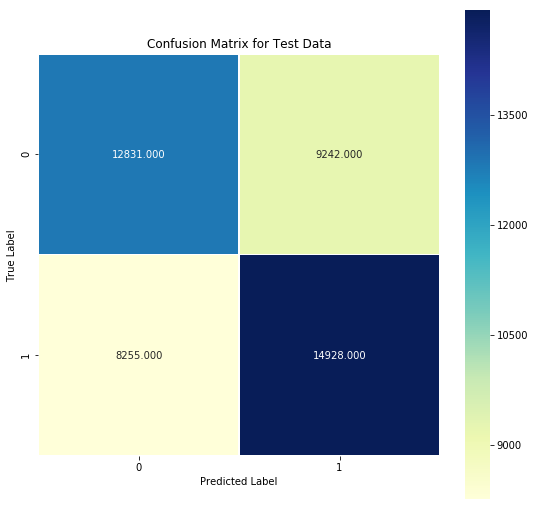

In [14]:
train_preds = xg_clf.predict(X_train)
test_preds = xg_clf.predict(X_test)

print("Training Scores")
print("Precision Score: {}".format(precision_score(y_train, train_preds)))
print("Recall Score: {}".format(recall_score(y_train, train_preds)))
print("Accuracy Score: {}".format(accuracy_score(y_train, train_preds)))
print("F1 Score: {}".format(f1_score(y_train, train_preds)))

cm_lr = confusion_matrix(y_train, train_preds)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Train Data')
    
print("\nTesting Scores")
print("Precision Score: {}".format(precision_score(y_test, test_preds)))
print("Recall Score: {}".format(recall_score(y_test, test_preds)))
print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds)))
print("F1 Score: {}".format(f1_score(y_test, test_preds)))
    
    
cm_lr = confusion_matrix(y_test, test_preds)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Test Data')

# Saving Predictions to CSV

In [21]:
logreg.predict_proba(df2)

array([[0.47340032, 0.52659968],
       [0.53345124, 0.46654876],
       [0.38955842, 0.61044158],
       ...,
       [0.32512205, 0.67487795],
       [0.44474916, 0.55525084],
       [0.55579057, 0.44420943]])

In [24]:
xg_clf.predict_proba(df2, validate_features=False)

array([[0.6864018 , 0.31359822],
       [0.7776674 , 0.22233263],
       [0.23496312, 0.7650369 ],
       ...,
       [0.20338434, 0.79661566],
       [0.27828526, 0.72171474],
       [0.7819756 , 0.21802437]], dtype=float32)

In [37]:
#The XGBoost model IS NOT better than the GridSearch Logreg Model
predictions = []
for predicts in xg_clf.predict_proba(df2, validate_features=False):
    predictions.append(predicts[1])

In [38]:
df3 = pd.DataFrame(predictions)

In [39]:
df3.rename({0:'radiant_win'}, axis=1, inplace=True)

In [40]:
df3.index.name = 'match_id'
df3.index += 1

In [41]:
df3.to_csv('Predictions_3.csv')

In [42]:
df3

,radiant_win
match_id,
1,0.313598
2,0.222333
3,0.765037
4,0.769226
5,0.152337
6,0.210902
7,0.586752
8,0.180614
9,0.790771
